In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

from mpl_toolkits.axes_grid1 import make_axes_locatable
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.neighbors import DistanceMetric
from math import radians

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn import metrics


from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Utilisation du DF data_features qui contient toute les données nettoyées et le climat koppen intégré

df = pd.read_csv('data_features.csv', sep=',', index_col=0) 
df.head()

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.9,44.0,22.0,1007.1,2008,24.0,9.5,7.0,0.6,0,...,8.0,1.224647e-16,-36.065766,12,0,0,7.6,20.0,-1.000000,0
1,12.9,44.0,25.0,1007.8,2008,22.0,17.7,1.0,0.0,0,...,1.0,9.238795e-01,-36.065766,12,0,0,12.0,4.0,-0.923880,0
2,8.0,46.0,30.0,1008.7,2008,26.0,12.8,2.0,0.0,0,...,7.0,1.224647e-16,-36.065766,12,0,0,8.0,19.0,-0.923880,0
3,2.2,24.0,16.0,1012.8,2008,9.0,18.8,6.0,0.0,0,...,8.0,-7.071068e-01,-36.065766,12,0,0,10.0,11.0,0.707107,0
4,6.7,41.0,33.0,1006.0,2008,20.0,14.8,8.0,1.0,0,...,7.0,3.826834e-01,-36.065766,12,0,0,4.8,7.0,-1.000000,0


In [3]:
features = ["sunshine","humidity3pm","pressure3pm","windspeed3pm","temp_amplitude",
            "cloud3pm","rainfall","climat","winddir3pm_sin","cloud9am", "latitude", 
            "geography", "raintoday", "evaporation", "windgustdir_cos", "windgustspeed", "humidity9am", "winddir3pm_sin",
           "longitude", "winddir9am_cos", "winddir9am_sin", "windspeed9am"]

In [5]:
#On supprime toutes les observations avec des NA
df1 = df.dropna()

target = df1["raintomorrow"]
data = df1[features]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=123)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# création d'un modèle séquentiel
model = Sequential()

# ajout des couches
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# entraînement du modèle
history_1 = model.fit(data, target, epochs=30, batch_size=32, validation_split=0.2)
history_1

Epoch 1/30
1818/1818 [==============================] - 10s 4ms/step - loss: 0.5704 - accuracy: 0.8251 - val_loss: 0.2997 - val_accuracy: 0.8846
Epoch 2/30
1818/1818 [==============================] - 7s 4ms/step - loss: 0.4925 - accuracy: 0.8326 - val_loss: 0.2963 - val_accuracy: 0.8834
Epoch 3/30
1818/1818 [==============================] - 7s 4ms/step - loss: 0.4626 - accuracy: 0.8371 - val_loss: 0.2871 - val_accuracy: 0.8820
Epoch 4/30
1818/1818 [==============================] - 7s 4ms/step - loss: 0.4358 - accuracy: 0.8393 - val_loss: 0.3226 - val_accuracy: 0.8788
Epoch 5/30
1818/1818 [==============================] - 7s 4ms/step - loss: 0.3959 - accuracy: 0.8491 - val_loss: 0.3100 - val_accuracy: 0.8810
Epoch 6/30
1818/1818 [==============================] - 7s 4ms/step - loss: 0.3723 - accuracy: 0.8530 - val_loss: 0.3111 - val_accuracy: 0.8777
Epoch 7/30
1818/1818 [==============================] - 7s 4ms/step - loss: 0.3557 - accuracy: 0.8572 - val_loss: 0.2831 - val_accuracy

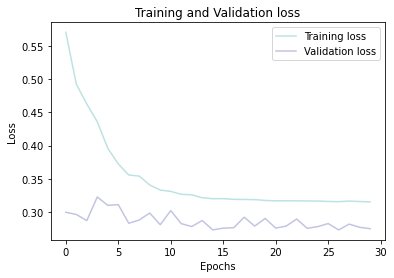

In [12]:
history_df = pd.DataFrame(history_1.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

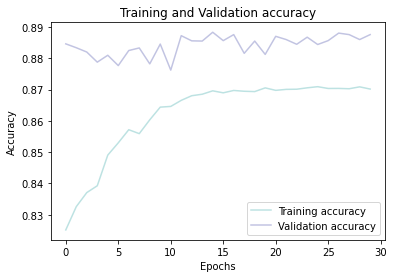

In [13]:
history_df = pd.DataFrame(history_1.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# création d'un modèle séquentiel
model = Sequential()

# ajout des couches
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dropout(0.2)) # couche de Dropout
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compilation du modèle avec un taux d'apprentissage adaptatif
earlystopping=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,restore_best_weights=True)
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# entraînement du modèle avec un nombre d'epochs augmenté
history_2 = model.fit(data, target, epochs=40, callbacks=[earlystopping], batch_size=64, validation_data=(X_test,y_test))
history_2

Epoch 1/40
1137/1137 [==============================] - 7s 5ms/step - loss: 5.5735 - accuracy: 0.7433 - val_loss: 0.4365 - val_accuracy: 0.8134
Epoch 2/40
1137/1137 [==============================] - 5s 4ms/step - loss: 1.6561 - accuracy: 0.7759 - val_loss: 0.5199 - val_accuracy: 0.8604
Epoch 3/40
1137/1137 [==============================] - 5s 4ms/step - loss: 0.9122 - accuracy: 0.8000 - val_loss: 0.5343 - val_accuracy: 0.8516
Epoch 4/40
1137/1137 [==============================] - 5s 4ms/step - loss: 0.5838 - accuracy: 0.8243 - val_loss: 0.3427 - val_accuracy: 0.8622
Epoch 5/40
1137/1137 [==============================] - 5s 4ms/step - loss: 0.4284 - accuracy: 0.8476 - val_loss: 0.3480 - val_accuracy: 0.8578
Epoch 6/40
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3870 - accuracy: 0.8552 - val_loss: 0.3312 - val_accuracy: 0.8676
Epoch 7/40
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3725 - accuracy: 0.8581 - val_loss: 0.3295 - val_accuracy:

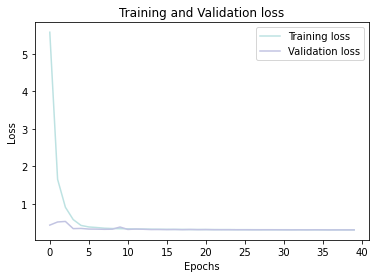

In [15]:
history_df = pd.DataFrame(history_2.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

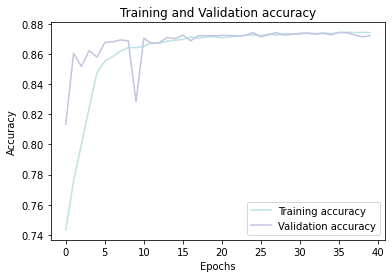

In [16]:
history_df = pd.DataFrame(history_2.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# prédiction sur les données de test
predictions = model.predict(X_test)

# convertir les probabilités en 0 ou 1
predictions = (predictions > 0.5).astype(int)

# évaluation de la performance sur les données de test
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

228/228 [==============================] - 1s 3ms/step
Accuracy on test set: 87.21%
